# HW2
### Muf Tayebaly mt3195

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

## Task 1

In [2]:
data = fetch_openml("credit-g",as_frame=True)
df = data.data
df["target"]=data.target
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [3]:
continuous_f = ['duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents']
categorical_f = ['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker']

## 1.1

In [4]:
print("\033[1mContinuous:\033[0m")
for x in range(0,len(continuous_f)):
    print(continuous_f[x])
print("\n\033[1mCategorical:\033[0m")
for x in range(0,len(categorical_f)):
    print(categorical_f[x])

Continuous:
duration
credit_amount
installment_commitment
residence_since
age
existing_credits
num_dependents

Categorical:
checking_status
credit_history
purpose
savings_status
employment
personal_status
other_parties
property_magnitude
other_payment_plans
housing
job
own_telephone
foreign_worker


## 1.2

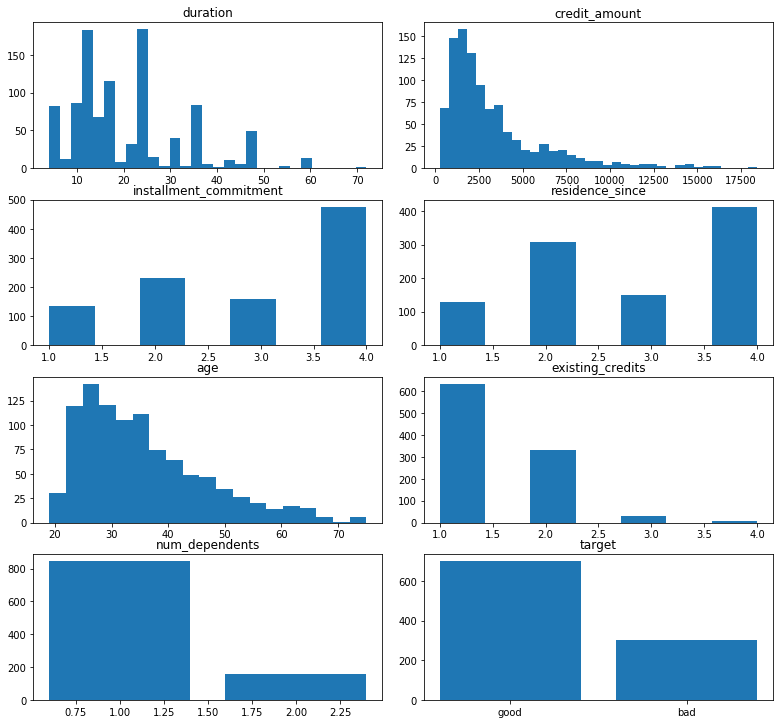

In [5]:
fig, ax = plt.subplots(4,2, figsize=(11, 10))
fig.tight_layout()

ax[0,0].set_title(continuous_f[0])
ax[0,0].hist(df[continuous_f[0]], bins='auto')

ax[0,1].set_title(continuous_f[1])
ax[0,1].hist(df[continuous_f[1]], bins='auto')

ax[1,0].set_title(continuous_f[2])
ax[1,0].hist(df[continuous_f[2]], bins=7)

ax[1,1].set_title(continuous_f[3])
ax[1,1].hist(df[continuous_f[3]], bins=7)

ax[2,0].set_title(continuous_f[4])
ax[2,0].hist(df[continuous_f[4]], bins='auto')

ax[2,1].set_title(continuous_f[5])
ax[2,1].hist(df[continuous_f[5]], bins=7)

ax[3,0].set_title(continuous_f[6])
ax[3,0].bar(df[continuous_f[6]].unique(), df[continuous_f[6]].value_counts())

ax[3,1].set_title("target")
ax[3,1].bar(df["target"].unique(), df["target"].value_counts())

plt.show()

## 1.3

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train, test = train_test_split(df, test_size=0.2)

In [8]:
y_train = train["target"]
X_train = train.loc[:, train.columns != "target"]

In [9]:
X_train_ohe = pd.get_dummies(X_train, columns=categorical_f)
#X_train_ohe.head()

In [10]:
y_train = y_train.map(dict(good=1, bad=0))
#y_train

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [12]:
X_train_np = X_train_ohe.to_numpy()
y_train_list = y_train.values.tolist()

In [13]:
evaluate = cross_val_predict(LogisticRegression(max_iter=5000), X_train_np, y_train_list, cv=5)
print("Evaluated on cross validation:",metrics.accuracy_score(y_train_list, evaluate))

Evaluated on cross validation: 0.765


## 1.4

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [15]:
#categorical = df.dtypes == object
preprocess = make_column_transformer(
    (OneHotEncoder(), categorical_f)
)

In [16]:
model1_pipe = make_pipeline(preprocess, LogisticRegression(max_iter=5000))
scores = cross_val_score(model1_pipe, X_train, y_train_list)
print("Logistic Regression evaluated on cross validation:", np.mean(scores))

Logistic Regression evaluated on cross validation: 0.73875


In [17]:
from sklearn.svm import LinearSVC

model2_pipe = make_pipeline(preprocess, LinearSVC(max_iter=5000))
scores2 = cross_val_score(model2_pipe, X_train, y_train_list)
print("Linear SVM evaluated on cross validation:", np.mean(scores2))

Linear SVM evaluated on cross validation: 0.7324999999999999


In [18]:
from sklearn.neighbors import KNeighborsClassifier

model3_pipe = make_pipeline(preprocess, KNeighborsClassifier(n_neighbors=3))
scores3 = cross_val_score(model3_pipe, X_train, y_train_list)
print("K Nearest Neighbors evaluated on cross validation:", np.mean(scores3))

K Nearest Neighbors evaluated on cross validation: 0.70625


In [19]:
preprocess2 = make_column_transformer(
    (StandardScaler(), continuous_f),
    (OneHotEncoder(), categorical_f)
)

model4_pipe = make_pipeline(preprocess2, LogisticRegression(max_iter=5000))
scores4 = cross_val_score(model4_pipe, X_train, y_train_list)
print("Logistic Regression (scaling) evaluated on cross validation:", np.mean(scores4))

model5_pipe = make_pipeline(preprocess2, LinearSVC(max_iter=5000))
scores5 = cross_val_score(model5_pipe, X_train, y_train_list)
print("Linear SVM (scaling) evaluated on cross validation:", np.mean(scores5))

model6_pipe = make_pipeline(preprocess2, KNeighborsClassifier(n_neighbors=3))
scores6 = cross_val_score(model6_pipe, X_train, y_train_list)
print("K Nearest Neighbors (scaling) evaluated on cross validation:", np.mean(scores6))

Logistic Regression (scaling) evaluated on cross validation: 0.7649999999999999
Linear SVM (scaling) evaluated on cross validation: 0.76
K Nearest Neighbors (scaling) evaluated on cross validation: 0.70375


It looks like Logistic Regression had the best evaluated cross val score in both without and with scaling.  The other two were not that much off, but Linear SVM was slightly better than Nearest Neighbors.
  
StandardScaling the continuous features helped improve the scores across all 3 models.

## 1.5

In [29]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action='ignore')

In [123]:
param_grid_lr = {"logisticregression__penalty":['l1','l2','none'],
             "logisticregression__C":np.logspace(-4, 4, 20)}
grid1 = GridSearchCV(model4_pipe, param_grid=param_grid_lr, cv=10)
best_lr = grid1.fit(X_train, y_train_list)

In [124]:
print(best_lr.best_params_)
print("Best LogReg val score:", best_lr.best_score_)

{'logisticregression__C': 0.08858667904100823, 'logisticregression__penalty': 'l2'}
Best LogReg val score: 0.76


In [36]:
y_test = test["target"]
X_test = test.loc[:, test.columns != "target"]

In [38]:
from sklearn.metrics import accuracy_score
pred_lr = best_lr.predict(X_test)

In [40]:
y_test = y_test.map(dict(good=1, bad=0))

In [54]:
lr_test_score = accuracy_score(y_test,pred_lr)
print("Best LogReg test score:",lr_test_score)

Best LogReg test score: 0.745


In [53]:
param_grid_lsvm = {'linearsvc__C': np.logspace(-3, 2, 6),
              'linearsvc__penalty': ['l1','l2']}
grid2 = GridSearchCV(model5_pipe, param_grid=param_grid_lsvm, cv=10)
best_lsvm = grid2.fit(X_train, y_train_list)

print(best_lsvm.best_params_)
print("Best Linear SVM val score:", best_lsvm.best_score_)

{'linearsvc__C': 0.01, 'linearsvc__penalty': 'l2'}
Best Linear SVM val score: 0.75625


In [55]:
pred_lsvm = best_lsvm.predict(X_test)
lsvm_test_score = accuracy_score(y_test,pred_lsvm)
print("Best Linear SVM test score:",lsvm_test_score)

Best Linear SVM test score: 0.735


In [60]:
param_grid_nn = {'kneighborsclassifier__n_neighbors': [1,2,3,4,5,6,7,8,9]}
grid3 = GridSearchCV(model6_pipe, param_grid=param_grid_nn, cv=10)
best_nn = grid3.fit(X_train, y_train_list)

print(best_nn.best_params_)
print("Best KNN val score:", best_nn.best_score_)

{'kneighborsclassifier__n_neighbors': 7}
Best KNN val score: 0.7337499999999999


In [61]:
pred_nn = best_nn.predict(X_test)
nn_test_score = accuracy_score(y_test,pred_nn)
print("Best KNN Test score:",nn_test_score)

Best KNN Test score: 0.775


In [67]:
import seaborn as sns

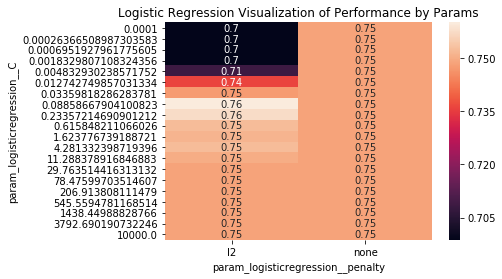

In [72]:
res_lr = pd.pivot_table(pd.DataFrame(grid1.cv_results_),
    values='mean_test_score', index='param_logisticregression__C', columns='param_logisticregression__penalty')
ax = plt.axes()
ax.set_title("Logistic Regression Visualization of Performance by Params")
sns.heatmap(res_lr, annot=True)
plt.show()

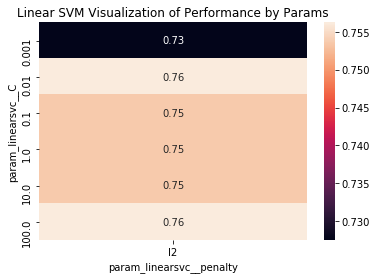

In [73]:
res_lsvm = pd.pivot_table(pd.DataFrame(grid2.cv_results_),
    values='mean_test_score', index='param_linearsvc__C', columns='param_linearsvc__penalty')
ax = plt.axes()
ax.set_title("Linear SVM Visualization of Performance by Params")
sns.heatmap(res_lsvm, annot=True)
plt.show()

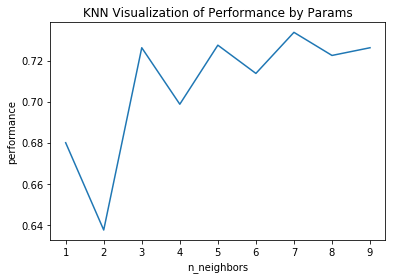

In [101]:
nn_x = grid3.cv_results_['param_kneighborsclassifier__n_neighbors'].tolist()
nn_y = grid3.cv_results_['mean_test_score'].tolist()
ax = plt.axes()
ax.set_title("KNN Visualization of Performance by Params")
ax.set_xlabel("n_neighbors")
ax.set_ylabel("performance")
plt.plot(nn_x, nn_y)
plt.show()

The results did improve for some and were about the same for others.  For example, KNN went from 0.704 to 0.734 val score.  Please see and compare results as printed above.

The test score was 0.745 on the best model (based on val score it was Log Reg). 

## 1.6

In [102]:
from sklearn.model_selection import KFold

In [103]:
k_fold_s = KFold(shuffle=True, random_state=1)

### KFold Shuffle random state 1

In [105]:
warnings.filterwarnings(action='ignore')
lr_kf_grid = GridSearchCV(model4_pipe, param_grid=param_grid_lr, cv=k_fold_s)
best_lr_kf = lr_kf_grid.fit(X_train, y_train_list)

print(best_lr_kf.best_params_)
print("Best Log Reg val score using KFold shuffle:", best_lr_kf.best_score_)

{'logisticregression__C': 0.08858667904100823, 'logisticregression__penalty': 'l2'}
Best Log Reg val score using KFold shuffle: 0.75


In [106]:
lsvm_kf_grid = GridSearchCV(model5_pipe, param_grid=param_grid_lsvm, cv=k_fold_s)
best_lsvm_kf = lsvm_kf_grid.fit(X_train, y_train_list)

print(best_lsvm_kf.best_params_)
print("Best Linear SVM val score using KFold shuffle:", best_lsvm_kf.best_score_)

{'linearsvc__C': 0.01, 'linearsvc__penalty': 'l2'}
Best Linear SVM val score using KFold shuffle: 0.75


In [107]:
nn_kf_grid = GridSearchCV(model6_pipe, param_grid=param_grid_nn, cv=k_fold_s)
best_nn_kf = nn_kf_grid.fit(X_train, y_train_list)

print(best_nn_kf.best_params_)
print("Best KNN val score using KFold shuffle:", best_nn_kf.best_score_)

{'kneighborsclassifier__n_neighbors': 7}
Best KNN val score using KFold shuffle: 0.71875


### KFold Shuffle random state 200

In [108]:
k_fold_s2 = KFold(shuffle=True, random_state=200)

lr_kf_grid2 = GridSearchCV(model4_pipe, param_grid=param_grid_lr, cv=k_fold_s2)
best_lr_kf2 = lr_kf_grid2.fit(X_train, y_train_list)

print(best_lr_kf2.best_params_)
print("Best Log Reg val score using KFold shuffle:", best_lr_kf2.best_score_)

lsvm_kf_grid2 = GridSearchCV(model5_pipe, param_grid=param_grid_lsvm, cv=k_fold_s2)
best_lsvm_kf2 = lsvm_kf_grid2.fit(X_train, y_train_list)

print(best_lsvm_kf2.best_params_)
print("Best Linear SVM val score using KFold shuffle:", best_lsvm_kf2.best_score_)

nn_kf_grid2 = GridSearchCV(model6_pipe, param_grid=param_grid_nn, cv=k_fold_s2)
best_nn_kf2 = nn_kf_grid2.fit(X_train, y_train_list)

print(best_nn_kf2.best_params_)
print("Best KNN val score using KFold shuffle:", best_nn_kf2.best_score_)

{'logisticregression__C': 0.23357214690901212, 'logisticregression__penalty': 'l2'}
Best Log Reg val score using KFold shuffle: 0.7512500000000001
{'linearsvc__C': 0.1, 'linearsvc__penalty': 'l2'}
Best Linear SVM val score using KFold shuffle: 0.7525000000000001
{'kneighborsclassifier__n_neighbors': 3}
Best KNN val score using KFold shuffle: 0.7224999999999999


### New random train test split

In [110]:
train2, test2 = train_test_split(df, test_size=0.2)

y_train2 = train["target"]
X_train2 = train.loc[:, train.columns != "target"]
y_train2 = y_train2.map(dict(good=1, bad=0))

In [111]:
lr_kf_grid3 = GridSearchCV(model4_pipe, param_grid=param_grid_lr, cv=k_fold_s2)
best_lr_kf3 = lr_kf_grid3.fit(X_train2, y_train2)

print(best_lr_kf3.best_params_)
print("Best Log Reg val score using KFold shuffle:", best_lr_kf3.best_score_)

lsvm_kf_grid3 = GridSearchCV(model5_pipe, param_grid=param_grid_lsvm, cv=k_fold_s2)
best_lsvm_kf3 = lsvm_kf_grid3.fit(X_train2, y_train2)

print(best_lsvm_kf3.best_params_)
print("Best Linear SVM val score using KFold shuffle:", best_lsvm_kf3.best_score_)

nn_kf_grid4 = GridSearchCV(model6_pipe, param_grid=param_grid_nn, cv=k_fold_s2)
best_nn_kf4 = nn_kf_grid4.fit(X_train2, y_train2)

print(best_nn_kf4.best_params_)
print("Best KNN val score using KFold shuffle:", best_nn_kf4.best_score_)

{'logisticregression__C': 0.23357214690901212, 'logisticregression__penalty': 'l2'}
Best Log Reg val score using KFold shuffle: 0.7512500000000001
{'linearsvc__C': 0.1, 'linearsvc__penalty': 'l2'}
Best Linear SVM val score using KFold shuffle: 0.7525000000000001
{'kneighborsclassifier__n_neighbors': 3}
Best KNN val score using KFold shuffle: 0.7224999999999999


Changing to KFold with shuffling did not change the best parameters found but changing the shuffle random_state did change the parameters found in the C value and n_neighbors as shown above.  Changing the train/test split random state did not change the parameters.

## 1.7

In [ ]:
plt.scatter()

In [177]:
lr_coef = best_lr.best_estimator_.steps[1][1].coef_
lsvm_coef = best_lsvm.best_estimator_.steps[1][1].coef_

#### Get feature names

In [234]:
ohe_cat = OneHotEncoder()
ohe_cat.fit(X_train[categorical_f])
cat_f = []
for val in ohe_cat.get_feature_names().tolist():
    cat_f.append(categorical_f[int(val[1:val.index("_")])]+"_"+val)

In [236]:
final_feature_names = continuous_f + cat_f

In [237]:
lr_coef_df = pd.DataFrame(list(zip(lr_coef[0], final_feature_names)),columns=['coef_value','feature_nm'])
lsvm_coef_df = pd.DataFrame(list(zip(lsvm_coef[0], final_feature_names)),columns=['coef_value','feature_nm'])

In [238]:
lr_df2 = lr_coef_df['coef_value'].abs().sort_values(ascending=False).index
lsvm_df2 = lsvm_coef_df['coef_value'].abs().sort_values(ascending=False).index

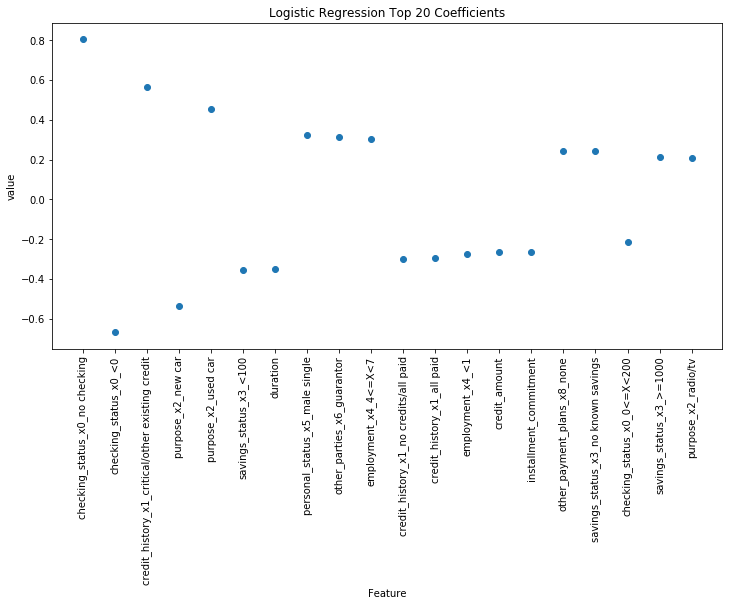

In [246]:
plt.figure(figsize=(12,6))
plt.scatter(lr_coef_df['feature_nm'].iloc[lr_df2[0:20]], lr_coef_df['coef_value'].iloc[lr_df2[0:20]])
plt.xticks(rotation=90)
plt.title("Logistic Regression Top 20 Coefficients")
plt.xlabel("Feature")
plt.ylabel("value")
plt.show()

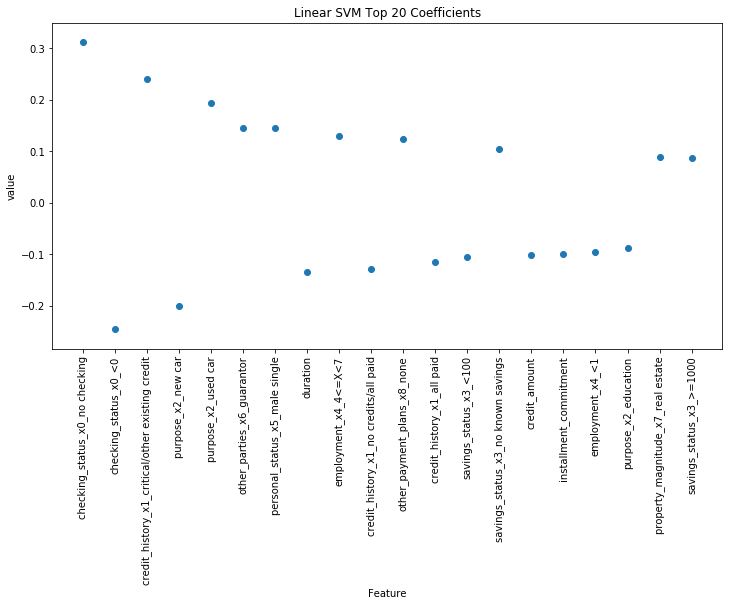

In [247]:
plt.figure(figsize=(12,6))
plt.scatter(lsvm_coef_df['feature_nm'].iloc[lsvm_df2[0:20]], lsvm_coef_df['coef_value'].iloc[lsvm_df2[0:20]])
plt.xticks(rotation=90)
plt.title("Linear SVM Top 20 Coefficients")
plt.xlabel("Feature")
plt.ylabel("value")
plt.show()